<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import display,HTML
display(HTML("<style>.container {width:95% !important;}</style>"))
pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',50)
sns.set(style='ticks',context='talk')
plt.style.use('dark_background') #Use Dark Background Theme
%config InlineBackend.figure_format='retina' #For Mac Retina Screen
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#OPEN FILE
import csv
with open('sat_scores.csv','r') as f: raw_pd=f.read().splitlines()
f.close()
raw_pd=[row.split(',') for row in raw_pd]

#CREATE DICT
dict_pd={}
for row in range(len(raw_pd)):
    for col in range(len(raw_pd[row])):
        if row: #If NOT Header Row
            dict_pd[raw_pd[0][col]].append(raw_pd[row][col]) #Add to dict key
        else: #If Header Row
            dict_pd[raw_pd[0][col]]=[] #Create Dict key

#CREATE DATAFRAME
df_sat=pd.DataFrame.from_dict(dict_pd) #Dict ==> Dataframe
print df_sat['State'].duplicated().sum(),'Duplicates' #Search for duplicates in column (Optional)

0 Duplicates


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
#Loading using Pandas read_csv is more efficient (1 line done); Don't need to import csv too!
df1=pd.DataFrame(dict_pd) #Create from SAT Dict
df_sat=pd.read_csv('sat_scores.csv',dtype=np.string_) #Pandas read_csv (Set all Cells as string)
print df_sat.shape,'\n\n',df_sat.info(),'\n\n',df_sat.describe(include='all')

(52, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null object
Verbal    52 non-null object
Math      52 non-null object
dtypes: object(4)
memory usage: 1.7+ KB
None 

       State Rate Verbal Math
count     52   52     52   52
unique    52   36     39   38
top       SD    4    562  499
freq       1    3      3    6


In [4]:
#REPLACE "WEIRD" CELL with NaN
df_sat=df_sat.replace(['^(~|`|!|@|#|\$|%|\^|&|\*|\(|\)|-|_|\+|=|\{|\}|\[|\]|\\|\||:|;|"|<|>|,|\.|\?|/|\s)+$'],[np.nan],regex=True)
df_sat=df_sat.apply(pd.to_numeric,errors='ignore') #String ==> Numeric

In [5]:
#Pandas Read CSV auto-convert columns with numbers to integers

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

#### Comments
Good! But be careful when doing replace with an entire string. The other special characters could have meanings elsewhere.

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
row_all=df_sat[df_sat['State']=='All'] #State "All" Row
df_sat=df_sat.drop(51,axis=0) #Remove "All" Row
# print df_sat.shape,'\n\n',df_sat.info(),'\n\n',df_sat.describe(include='all')
# df_sat.head(10)

In [7]:
#FIGURING STATE "ALL" ROW
print row_all
print '     Mean',np.mean(df_sat['Rate']),np.mean(df_sat['Verbal']),np.mean(df_sat['Math'])
print '     Median',np.median(df_sat['Rate']),np.median(df_sat['Verbal']),np.median(df_sat['Math'])
print df_sat[(df_sat['Rate']==45) | (df_sat['Verbal']==506) | (df_sat['Math']==514)]

   State  Rate  Verbal  Math
51   All    45     506   514
     Mean 37.0 532.529411765 531.843137255
     Median 33.0 527.0 525.0
  State  Rate  Verbal  Math
8    ME    69     506   500


The data seem to describe the SAT test scores of US 50 States & District of Columbia (DC)
State "All" Row is Removed; Unknown as above investigation turns out nothing

#### Comments
Good! 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
#FIND "RATE" CORRELATION
df_sat['Total']=df_sat['Math']+df_sat['Verbal'] #Math + Verbal (Create NEW Column)
print df_sat.sort_values(by=['Rate'],ascending=False)[1:20:2]
df_sat[['Rate','Math','Verbal','Total']].corr(method='pearson').style.background_gradient(cmap='PiYG')

   State  Rate  Verbal  Math  Total
1     NJ    81     499   513   1012
3     NY    77     495   505   1000
5     RI    71     501   499   1000
7     VT    69     511   506   1017
9     VA    68     510   501   1011
12    NC    65     493   499    992
13    GA    63     491   489    980
15    SC    57     486   488    974
17    OR    55     526   526   1052
19    WA    53     527   527   1054


,Rate,Math,Verbal,Total
Rate,1,-0.773419,-0.888121,-0.84986
Math,-0.773419,1,0.899909,0.976768
Verbal,-0.888121,0.899909,1,0.972453
Total,-0.84986,0.976768,0.972453,1


In [9]:
data_dict={
    'State':{'type':'object','describe':'USA State'},
    'Rate':{'type':'int64','describe':'University Rejection Rate'}, #Due to high negative correlation w Math,Verbal,Total
    'Verbal':{'type':'int64','describe':'SAT Reading and Writing Average Test Score (200 - 800)'},
    'Math':{'type':'int64','describe':'SAT Math Average Test Score (200 - 800)'},
    'Total':{'type':'int64','describe':'Total SAT Average Test Score (400 - 1600)'},
    'Shape':{'Rows':df_sat.shape[0],'Columns':df_sat.shape[1]}}

#### Comments
Good!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

C:\Users\Luther\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


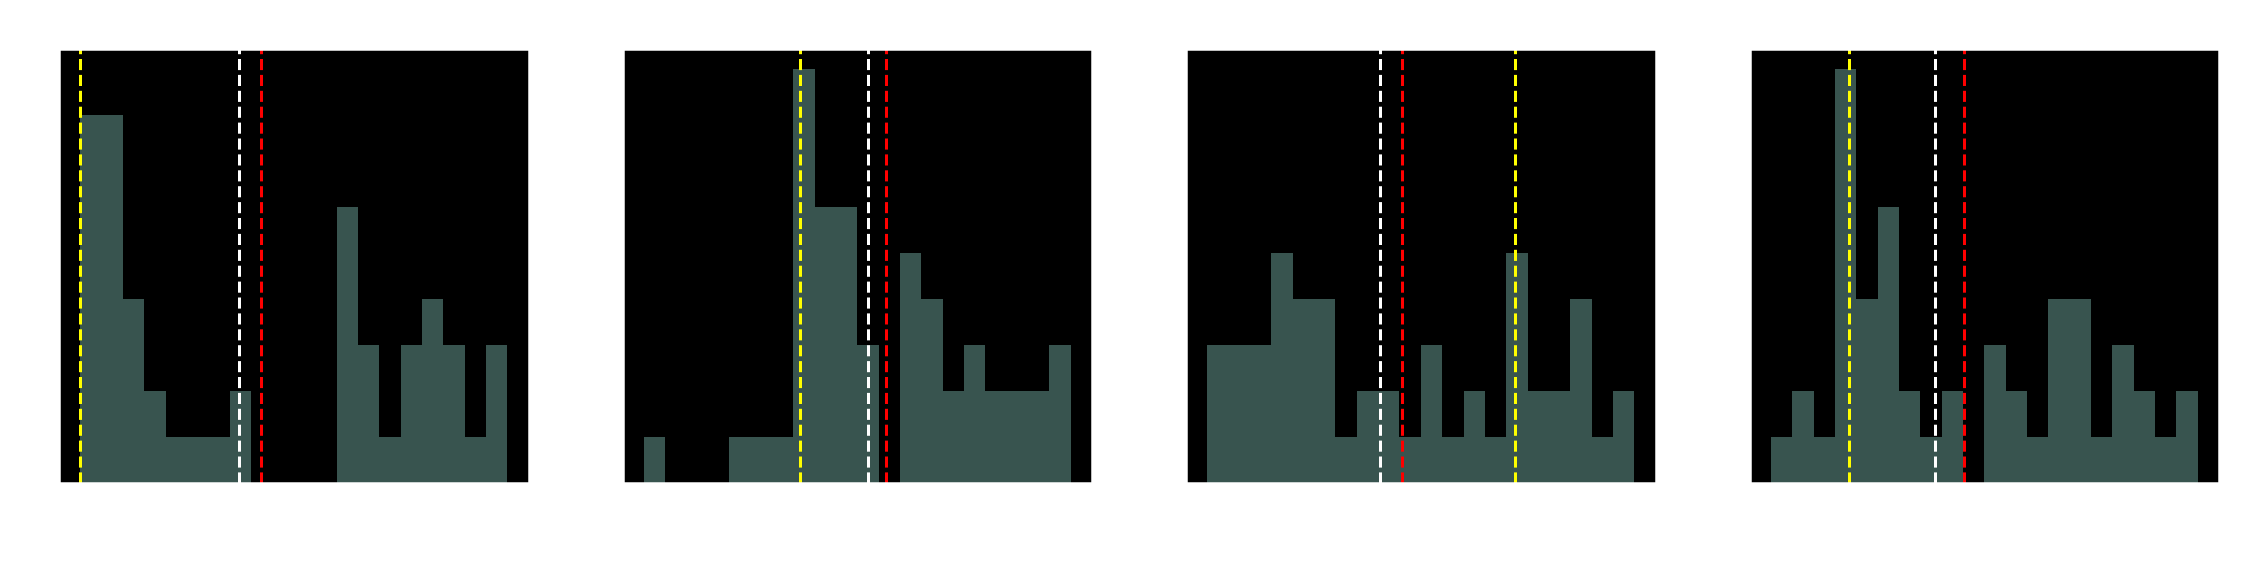

In [10]:
name=['Rate','Math','Verbal','Total']
fig,ax=plt.subplots(1,4,sharex='col',sharey='row')
plt.subplots_adjust(left=.5,right=3)
for a in range(4):
    ax[a].set_title(name[a],y=1)
    ax[a].axvline(np.median(df_sat[name[a]]),color='white',linestyle='--',lw=1.5) #Median Line
    ax[a].axvline(np.mean(df_sat[name[a]]),color='red',linestyle='--',lw=1.5) #Mean Line
    ax[a].axvline(stats.mode(df_sat[name[a]])[0],color='yellow',linestyle='--',lw=1.5) #Mode Line
    sns.distplot(df_sat[name[a]],bins=20,kde=False,ax=ax[a])

1. Rate,Verbal,Total does not follow a normal distribution; closest would be Math (Negative Skewed in a way)
2. Rate tend to be either Good or Bad with nothing much in the middle (higher at both tails) 
3. Verbal scores tend to be mostly either bad or good (higher at both tails)
4. Math scores tend to be more normal with a concentration in the middle; Not much people do bad in math.
5. In general, Math scores are better than Verbal scores
6. For Total Scores

#### Comments
Good!

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

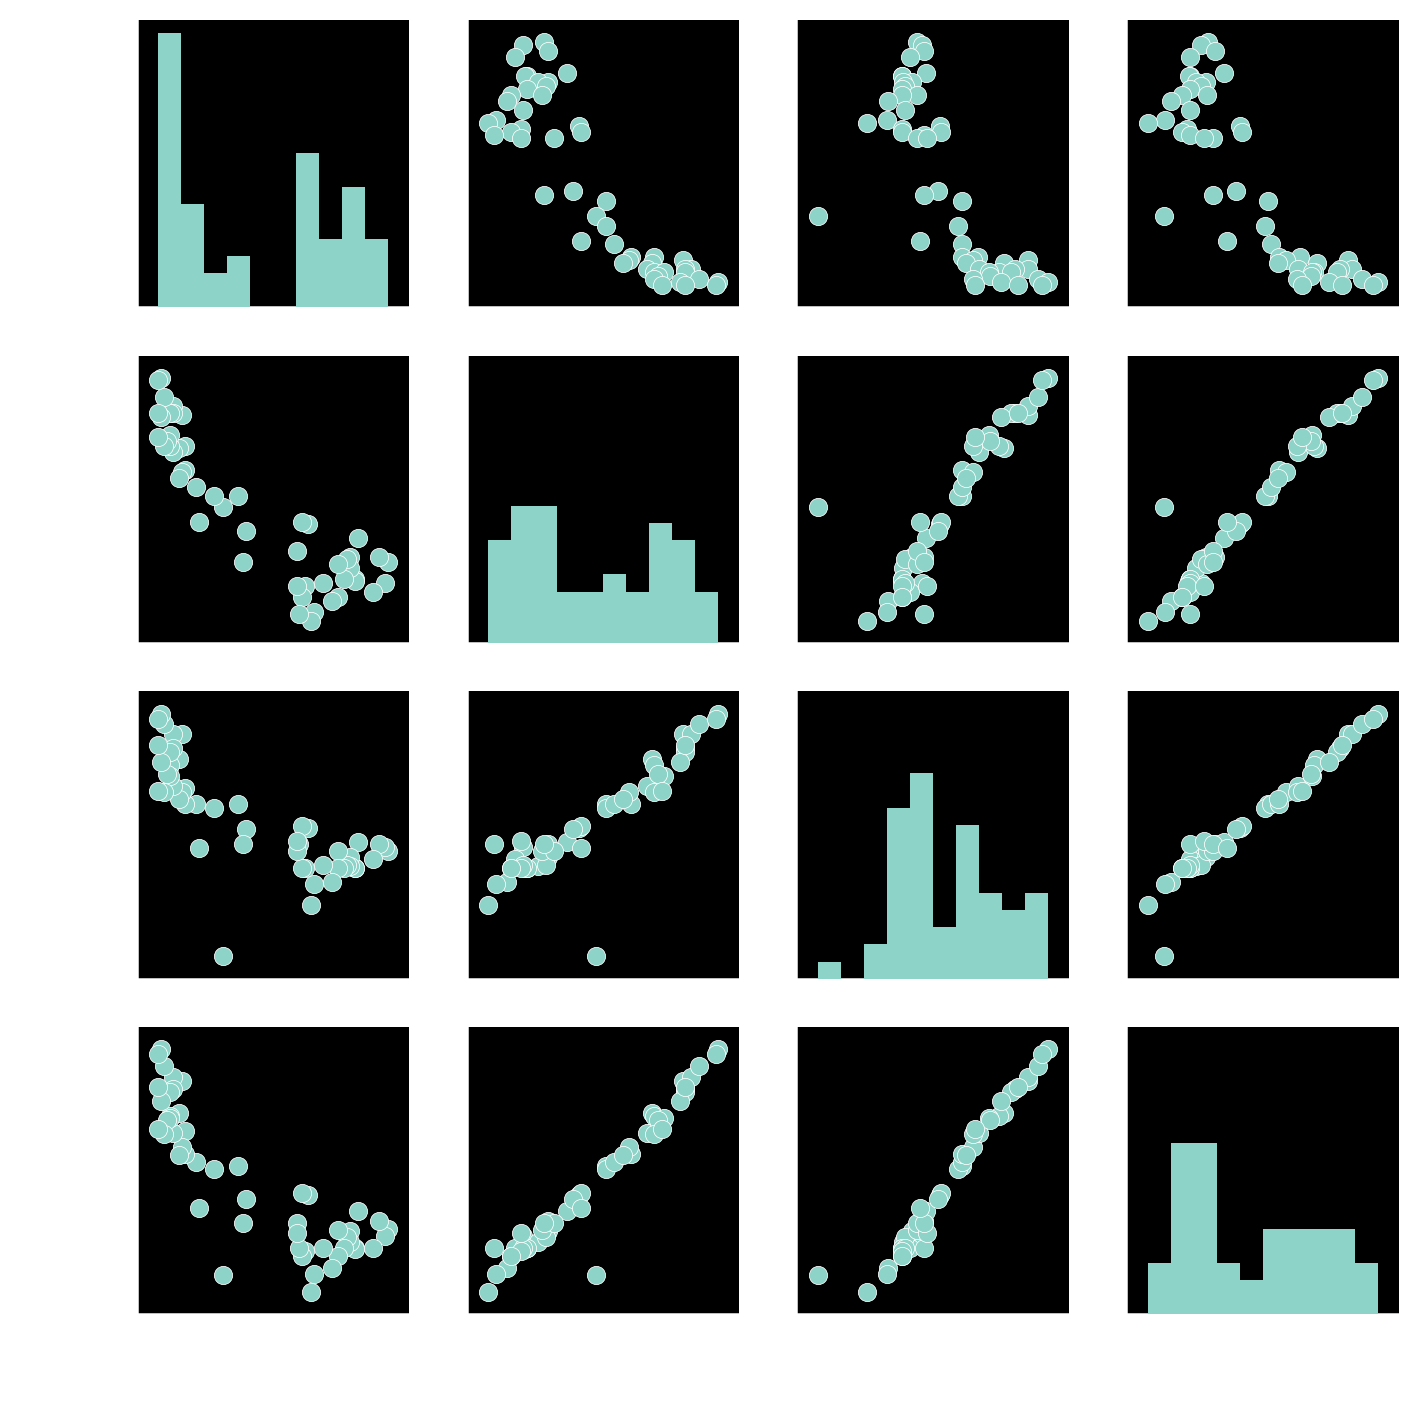

In [11]:
sns.pairplot(df_sat)

1. Those who score well in Math tend to score well in verbal (very high positive correlation)
2. Those with high "Rate" tend to have low math,verbal, & Total (high negative correlation)
3. Just By eyeballing, Math may have a outlier

#### Comments
Good! but I cannot see the axis labels of your graph. Could be a issueof us using different background colour.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

<Figure size 432x288 with 0 Axes>

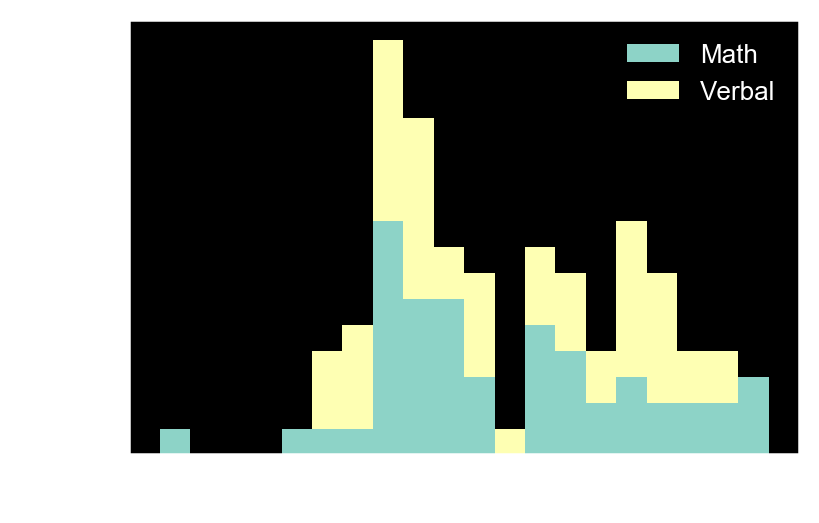

In [12]:
plt.figure();
df_sat[['Math','Verbal']].plot.hist(stacked=True,bins=20)

#### Comments
Good! You can consider plotting the graphs on 2 different plots and make one of them translucent for great visual

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

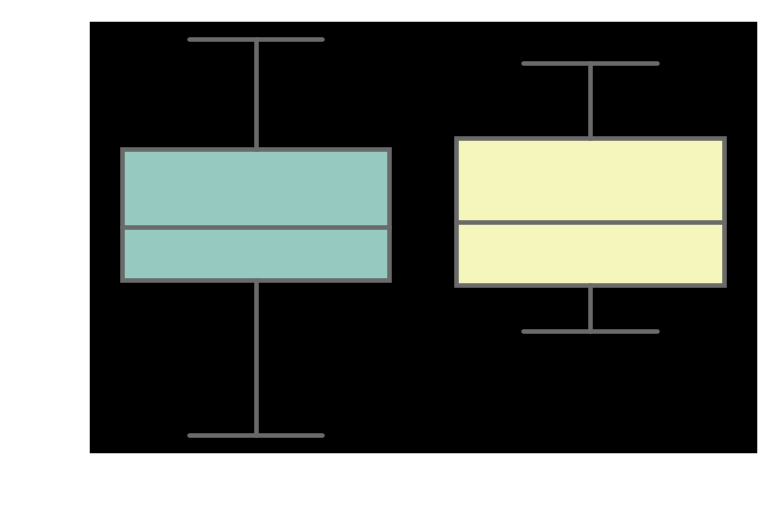

In [13]:
#With box plots, you can clearly see the range,median,25th ercentile,75th percentile
#Rate =/= Verbal & Math Units/Scale
sns.boxplot(data=df_sat[['Math','Verbal']])

#### Comments
Good!

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


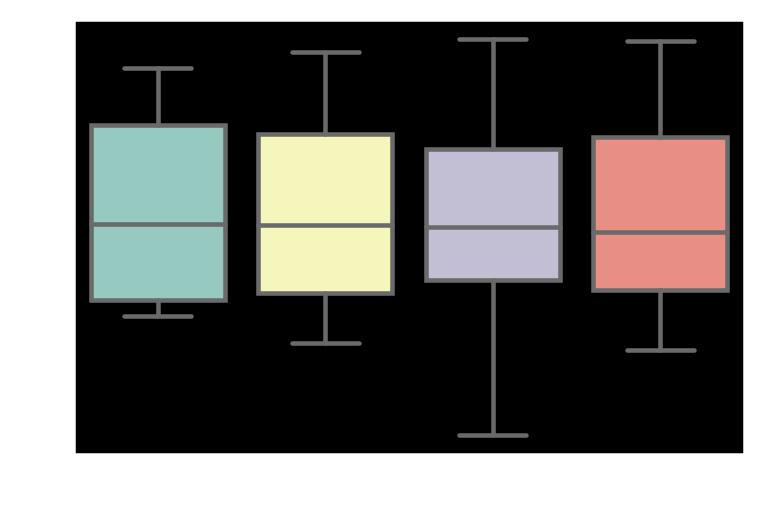

In [14]:
df_box=df_sat.copy(deep=True) #Deepcopy
tmp=['Rate','Math','Verbal','Total']
for a in range(4):
    avg=df_box[tmp[a]].mean()
    std=np.std(df_box[tmp[a]])
    df_box[tmp[a]]=df_box[tmp[a]].map(lambda b: (b-avg)/std) #(Value - Mean) / STD
sns.boxplot(data=df_box)

(Value - Mean) / Standard Deviation: Force distribution of each variable to have a mean of 0 & standard deviation of 1

#### Comments
Good! The key idea is to put all the variables on the same scale so they are comparable. Note that it is wrong to say they have a std dev of 1. The values are actually number of std dev away from the mean.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
#Plainly looking at numbers below (nearly 1/2 exceeds Mean), distribution seem somewhat normal/equal; however we would need visuals to confirm.
avg=df_sat['Verbal'].mean()
ctr=float(df_sat.loc[(df_sat['Verbal']>avg),'State'].count())
print 'Average:',avg
print ctr,'(',(ctr/df_sat.shape[0]*100),'% )  States > Mean'
print df_sat.loc[(df_sat['Verbal']>avg),'State'].values

Average: 532.529411765
24.0 ( 47.0588235294 % )  States > Mean
['CO' 'OH' 'MT' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE'
 'OK' 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']


#### Comments
Nice!

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [16]:
#Exactly same states as those > Mean. Without Visuals, indicates a normal distribution that is somewhat right-skewed
med=df_sat['Verbal'].median()
print 'Median:',med
print df_sat.loc[(df_sat['Verbal']<=med),'State'].count(),'<= MED <',df_sat.loc[(df_sat['Verbal']>med),'State'].count()
print df_sat.loc[(df_sat['Verbal']>med),'State'].values

Median: 527.0
27 <= MED < 24
['CO' 'OH' 'MT' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE'
 'OK' 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']


#### Comments
Nice!

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
df_sat['Diff']=df_sat['Verbal']-df_sat['Math']
df_sat.head(5)

,State,Rate,Verbal,Math,Total,Diff
0,CT,82,509,510,1019,-1
1,NJ,81,499,513,1012,-14
2,MA,79,511,515,1026,-4
3,NY,77,495,505,1000,-10
4,NH,72,520,516,1036,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
df_sat.sort_values(by='Diff',ascending=False)[:3]

,State,Rate,Verbal,Math,Total,Diff
27,OH,26,534,439,973,95
50,MS,4,566,551,1117,15
29,WV,18,527,512,1039,15


In [19]:
df_sat.sort_values(by='Diff',ascending=True)[:3]

,State,Rate,Verbal,Math,Total,Diff
21,HI,52,485,515,1000,-30
23,CA,51,498,517,1015,-19
1,NJ,81,499,513,1012,-14


#### Comments
Nice!

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [20]:
#Shows All positively related to each other except only "Rate" being Negatively Correlated to all others
cor=df_sat[['Rate','Math','Verbal']].corr(method='pearson').style.background_gradient(cmap='PiYG')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [21]:
df_sat.describe()

,Rate,Verbal,Math,Total,Diff
count,51.00,51.00,51.00,51.00,51.00
mean,37.00,532.53,531.84,"1,064.37",0.69
std,27.55,33.36,36.29,67.89,15.84
min,4.00,482.00,439.00,956.00,-30.00
25%,9.00,501.00,503.00,"1,003.00",-6.00
50%,33.00,527.00,525.00,"1,048.00",0.00
75%,64.00,562.00,557.50,"1,121.50",4.50
max,82.00,593.00,603.00,"1,196.00",95.00


count: Total count of values
mean: Average of values
std: Standard Deviation of values
min: Lowest Value
25%: 25th percentile of values
50%: Median of values
75%: 75th percentile of values
max: Highest value

#### Comments
Nice!

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

1. Covariance matrix is non-scaled correlation, while correlation matrix is scaled.
2. Divide Covariance by the multiplication of standard deviations of Random Variables (x & y))
3. Correlation matrix values range -1 to 1, while Covariance Matrix range can be whatever

In [22]:
df_sat[['Rate','Math','Verbal']].cov().style.background_gradient(cmap='PiYG')

,Rate,Math,Verbal
Rate,759.04,-773.22,-816.28
Math,-773.22,1316.77,1089.4
Verbal,-816.28,1089.4,1112.93


#### Comments
Nice! Key thing to note is correlation provides a measure on the strength of linear relationship which covar does not.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [23]:
df_drug=pd.read_csv('./drug-use-by-age.csv')
#print df_drug.isnull().sum(),'\n\n',df_drug.info(),'\n\n',df_drug.describe(include='all'),'\n\n',df_drug

1. Assuming People surveyed to be representative of the population in terms of location,ethnic,& household income etc ("Fair Survey")
2. Legends
    a. "-used": % of those in age group who used drugs in past 12 mths (2012)
    b. "-frequency": Median number of times a user in age group used in past 12 mths (2012)
3. Data Requires cleaning & Fixing:-
    a. age: has specific age, ranges (eg. 35-49), & "65+"
    b. n: people sureyed varies greatly
    c. cocaine-frequency/crack-frequency/heroin-frequency/inhalant-frequency/oxycontin-frequency/meth-frequency: Have "-" values
    d. heroin-frequency/stimulant-frequency: Have values > 100%
    e. Rows that has zero % user but has frequency
4. Analysis is hampered by inconsistent,missing,& incorrect data
    a. An inaccurate picture will be drawn eg. like getting the mean for columns.
    b. People surveyed per age group "n" not equal or even close; comparisons between the different age groups inaccurate
    c. Age groups ranges differ; comparisons between the different age groups inaccurate

In [24]:
#NaN,Weird & Zero Cells
df_drug=df_drug.replace(['^(~|`|!|@|#|\$|%|\^|&|\*|\(|\)|-|_|\+|=|\{|\}|\[|\]|\\|\||:|;|"|<|>|,|\.|\?|/|\s)+$',0],[np.nan,np.nan],regex=True)

#REFORMAT NUMERIC COLUMNS
for a,b in df_drug.items(): #For each column
    if df_drug[a].dtype=='object': #If col is object
        try: df_drug[a]=pd.to_numeric(df_drug[a]) #String ==> Numeric
        except: pass
#print df_drug.info(),'\n\n',df_drug.describe(include='all'),'\n\n',df_drug

In [25]:
#FIX & CLEAN CELLs
col=df_drug.columns.values[2:]
for a,b in df_drug.iterrows(): #For each row
    for c in range(0,len(col),2): #For each "-use" Cell
        val=df_drug.loc[a,col[c]]
        if(val>0) and (val<=100): #If 0 < use % <=100
            #df_drug.loc[a,col[c]]=val/100*df_drug.loc[a,'n'] #Age Group User % ==> Count
            pass
        else: #If use % zero or got problem
            df_drug.loc[a,col[c]]=np.nan #NaN use cell
            df_drug.loc[a,col[c+1]]=np.nan #NaN related frequency cell

#### Comments
Nice!

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [26]:
#CHK CORRELATION: MEDIAN no. of TIMES per User vs AGE GROUP USERs
for a,b in df_drug.items():
    if '-use' in a:
        name=a[:-4]
        cor=df_drug[[a,name+'-frequency']].corr(method='spearman').values[1][0]
        if abs(cor)>.6: print name,':',cor

alcohol : 0.8790475323984228
marijuana : 0.6447575533641797


In [27]:
#SPLIT USE & FREQUENCY
use=df_drug[['age']].copy(deep=True) #[Age] Dataframe (Use)
freq=df_drug[['age']].copy(deep=True) #[Age] Dataframe (Freq)
for a,b in df_drug.items():
    if '-use' in a:  #If got "-use" in Col name
        #use[a]=b/100*df_drug['n'] #Age Group User % ==> Count
        use[a]=b #Add to Use Dataframe
    elif '-frequency' in a: #If got "-frequency" in Col name
        freq[a]=b #Add to freq Dataframe

use.columns=[a[:-4] if '-use' in a else a for a in use] #Remove "-use" from col names
freq.columns=[a[:-10] if '-frequency' in a else a for a in freq] #Remove "-frequency" from col names

In [28]:
use.describe()

,alcohol,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain-releiver,oxycontin,tranquilizer,stimulant,meth,sedative
count,17.00,17.00,16.00,12.00,15.00,17.00,16.00,17.00,16.00,17.00,16.00,15.00,16.00
mean,55.43,18.92,2.31,0.42,0.40,3.39,1.47,6.27,0.99,2.81,2.04,0.43,0.30
std,26.88,11.96,1.78,0.16,0.33,2.79,0.88,3.17,0.58,1.75,1.36,0.24,0.12
min,3.90,1.10,0.10,0.10,0.10,0.10,0.20,0.60,0.10,0.20,0.20,0.10,0.10
25%,40.10,8.70,0.80,0.40,0.10,0.60,0.75,3.90,0.40,1.40,0.75,0.25,0.20
50%,64.60,20.80,2.05,0.50,0.40,3.20,1.45,6.20,1.15,3.50,2.05,0.40,0.30
75%,77.50,28.40,4.03,0.50,0.60,5.20,2.12,9.00,1.42,4.20,3.08,0.60,0.40
max,84.20,34.00,4.90,0.60,1.10,8.60,3.00,10.00,1.70,5.40,4.10,0.90,0.50


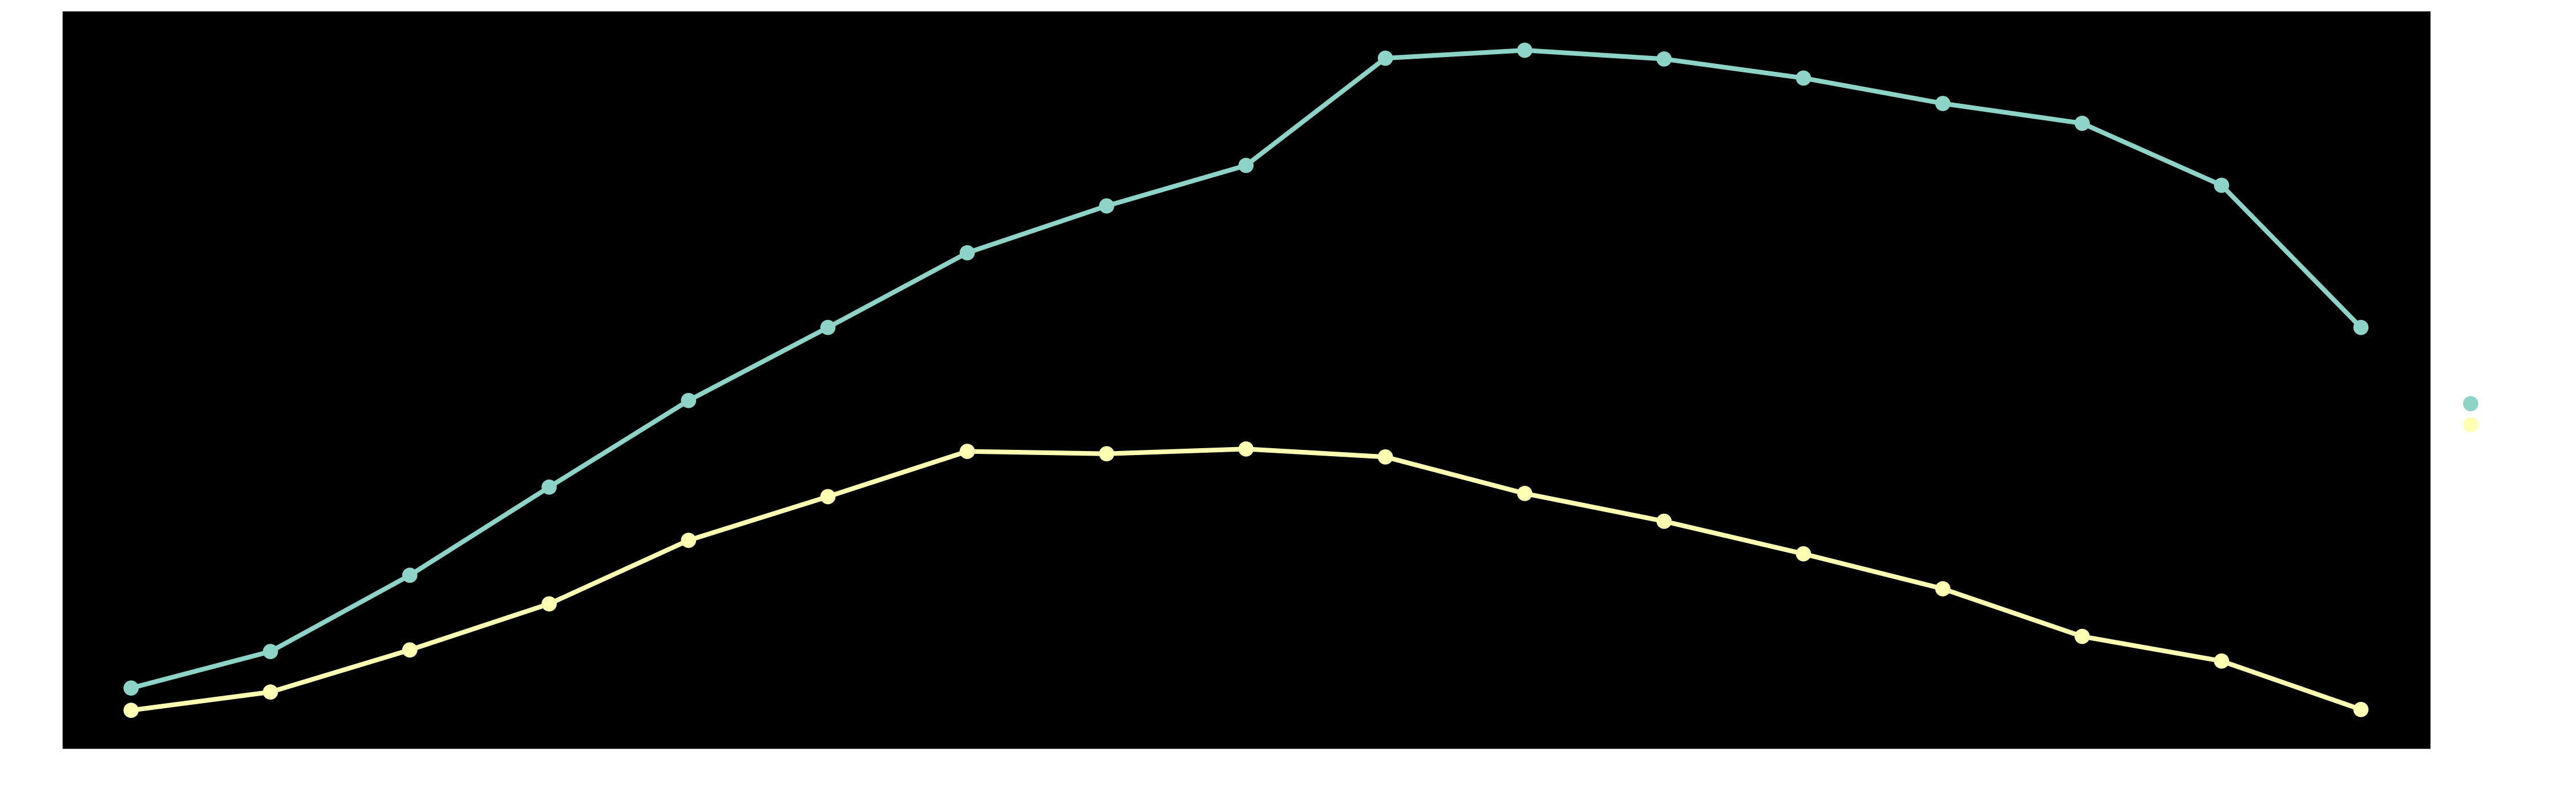

In [53]:
am_use=use[['age','alcohol','marijuana']].melt('age',var_name='type',value_name='% of Users')

sns.factorplot(x='age',y='% of Users',hue='type',size=10,aspect=3,data=am_use)

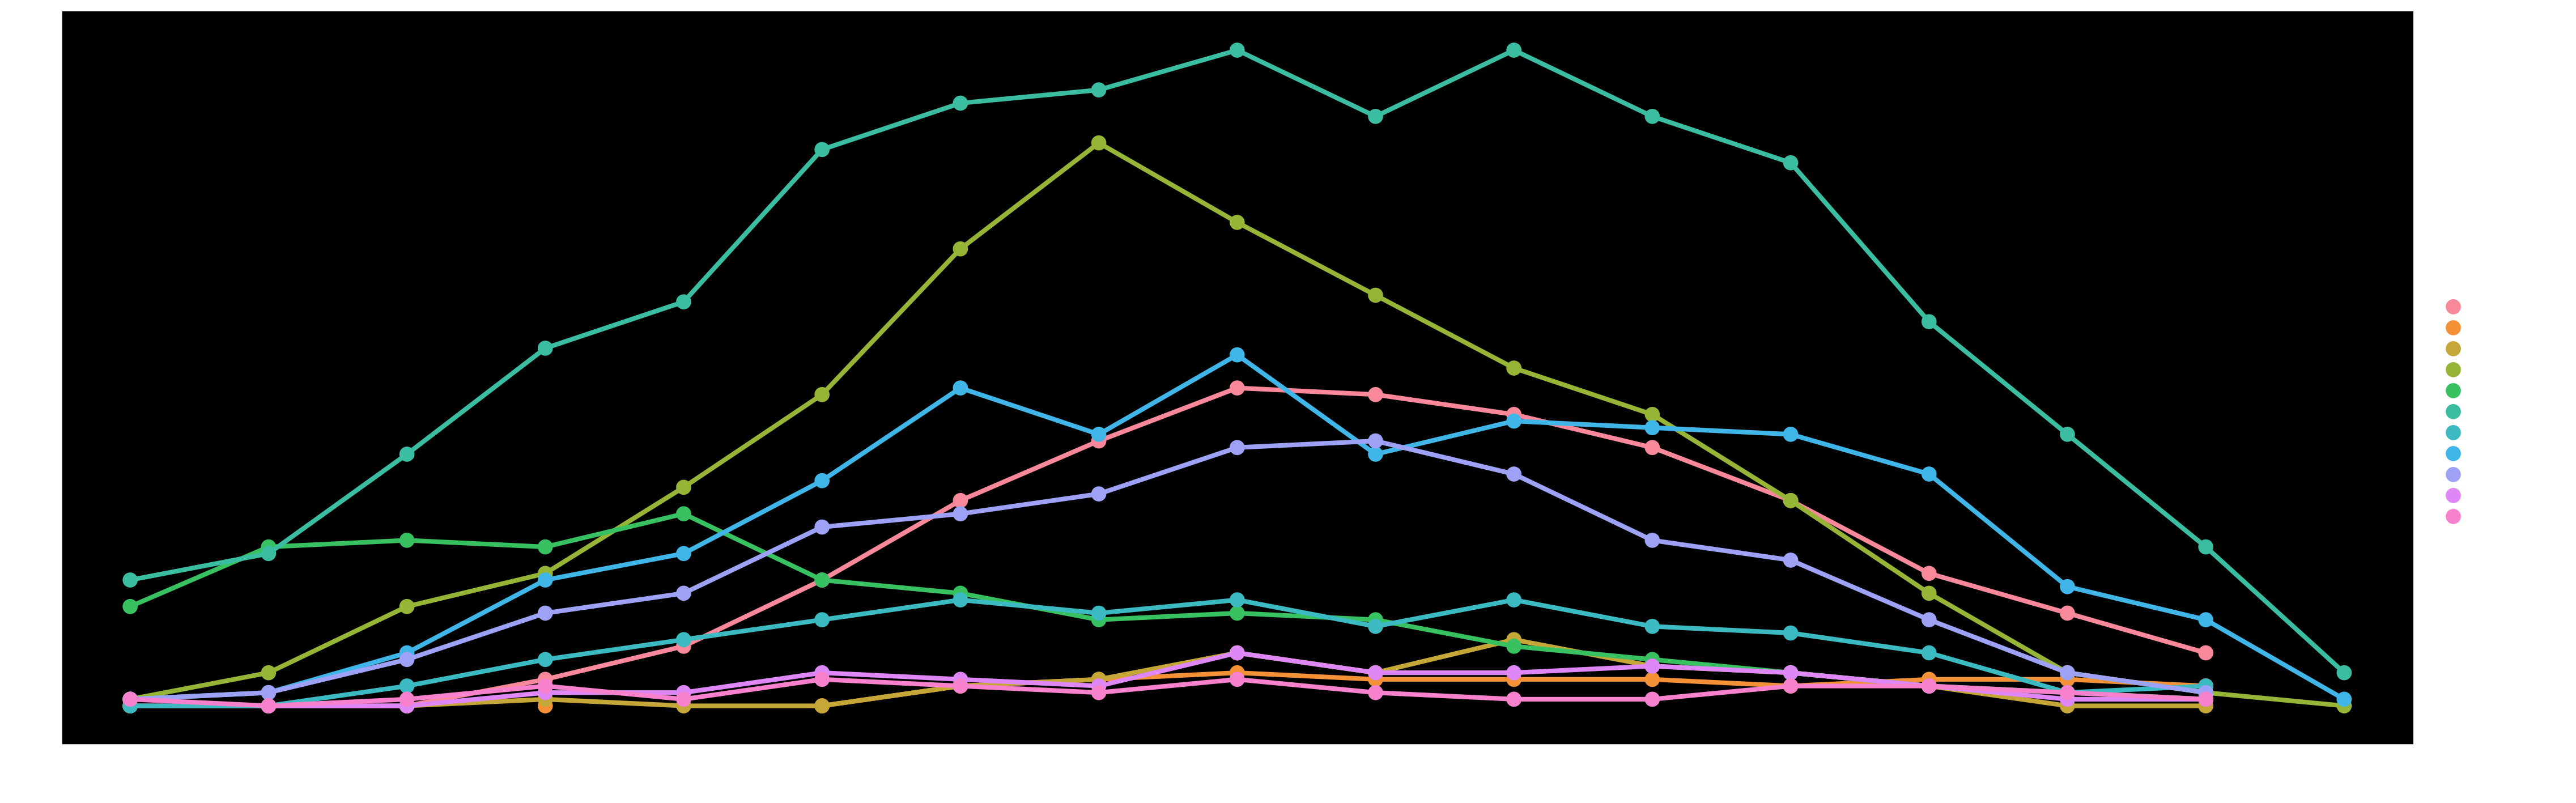

In [30]:
#Age group users % in past 12 mths (2012)
s_use=use.drop(['alcohol','marijuana'],axis=1).melt('age',var_name='type',value_name='% of Users')
sns.factorplot(x='age',y='% of Users',hue='type',size=10,aspect=3,data=s_use)

In [31]:
#PAIRPLOT: % of AGE GROUP USED
#sns.pairplot(use.iloc[:,1:].fillna(0))

In [32]:
freq.describe()

,alcohol,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain-releiver,oxycontin,tranquilizer,stimulant,meth,sedative
count,17.00,17.00,16.00,12.00,15.00,17.00,16.00,17.00,16.00,17.00,16.00,15.00,16.00
mean,33.35,42.94,7.88,17.21,70.17,8.41,6.16,14.71,14.81,11.74,10.34,35.97,19.66
std,21.32,18.36,8.04,18.75,71.39,15.00,4.86,6.94,12.80,11.49,6.05,31.97,25.62
min,3.00,4.00,1.00,2.00,1.00,2.00,2.00,7.00,3.00,4.50,2.00,2.00,3.00
25%,10.00,30.00,5.00,5.75,38.25,3.00,3.38,12.00,5.75,6.00,6.75,12.00,6.38
50%,48.00,52.00,5.25,9.75,50.00,3.00,4.00,12.00,12.00,10.00,9.75,30.00,10.00
75%,52.00,52.00,7.25,18.00,66.25,4.00,6.62,15.00,18.12,11.00,12.00,47.00,17.88
max,52.00,72.00,36.00,62.00,280.00,52.00,19.00,36.00,46.00,52.00,24.00,105.00,104.00


In [33]:
#CORRELATION CHECK: MEDIAN NO. OF TIMES
done,lists,counts=[],[],{}
for a,b in freq.iloc[:,1:].items():
    counts[a]=0
    for c,d in freq.iloc[:,1:].items():
        if (a!=c): #If not same item (ALLOW DUPLICATE)
        #if (a!=c) and (c not in done): #If not same item & yet compared items (NO DUPLICATE)
            cor=float("{0:.2f}".format(freq[[a,c]].corr(method='spearman').values[1][0])) #Correlation Rounded 2 Decimals
            if abs(cor)>.7:
                counts[a]+=1
                lists.append(a+' & '+c+':  '+str(cor))
    done.append(a)
print {a:b for (a,b) in counts.items() if b>0} #Print only those > 0 correlation
lists

{'alcohol': 1, 'pain-releiver': 1, 'marijuana': 1, 'oxycontin': 1, 'heroin': 1, 'meth': 1, 'cocaine': 1, 'stimulant': 1}


['alcohol & marijuana:  0.71',
 'marijuana & alcohol:  0.71',
 'cocaine & stimulant:  0.8',
 'heroin & meth:  0.76',
 'pain-releiver & oxycontin:  0.85',
 'oxycontin & pain-releiver:  0.85',
 'stimulant & cocaine:  0.8',
 'meth & heroin:  0.76']

In [34]:
# #PLOT STANDARDIZED BOXPLOT
# df_box=freq.iloc[:,1:]
# for a,b in df_box.items():
#     avg=df_box[a].mean()
#     std=np.std(df_box[a])
#     df_box[a]=df_box[a].map(lambda b: (b-avg)/std) #(Value - Mean) / STD
# fig=plt.figure(figsize=(20,5))
# sns.boxplot(data=df_box,ax=fig.gca())

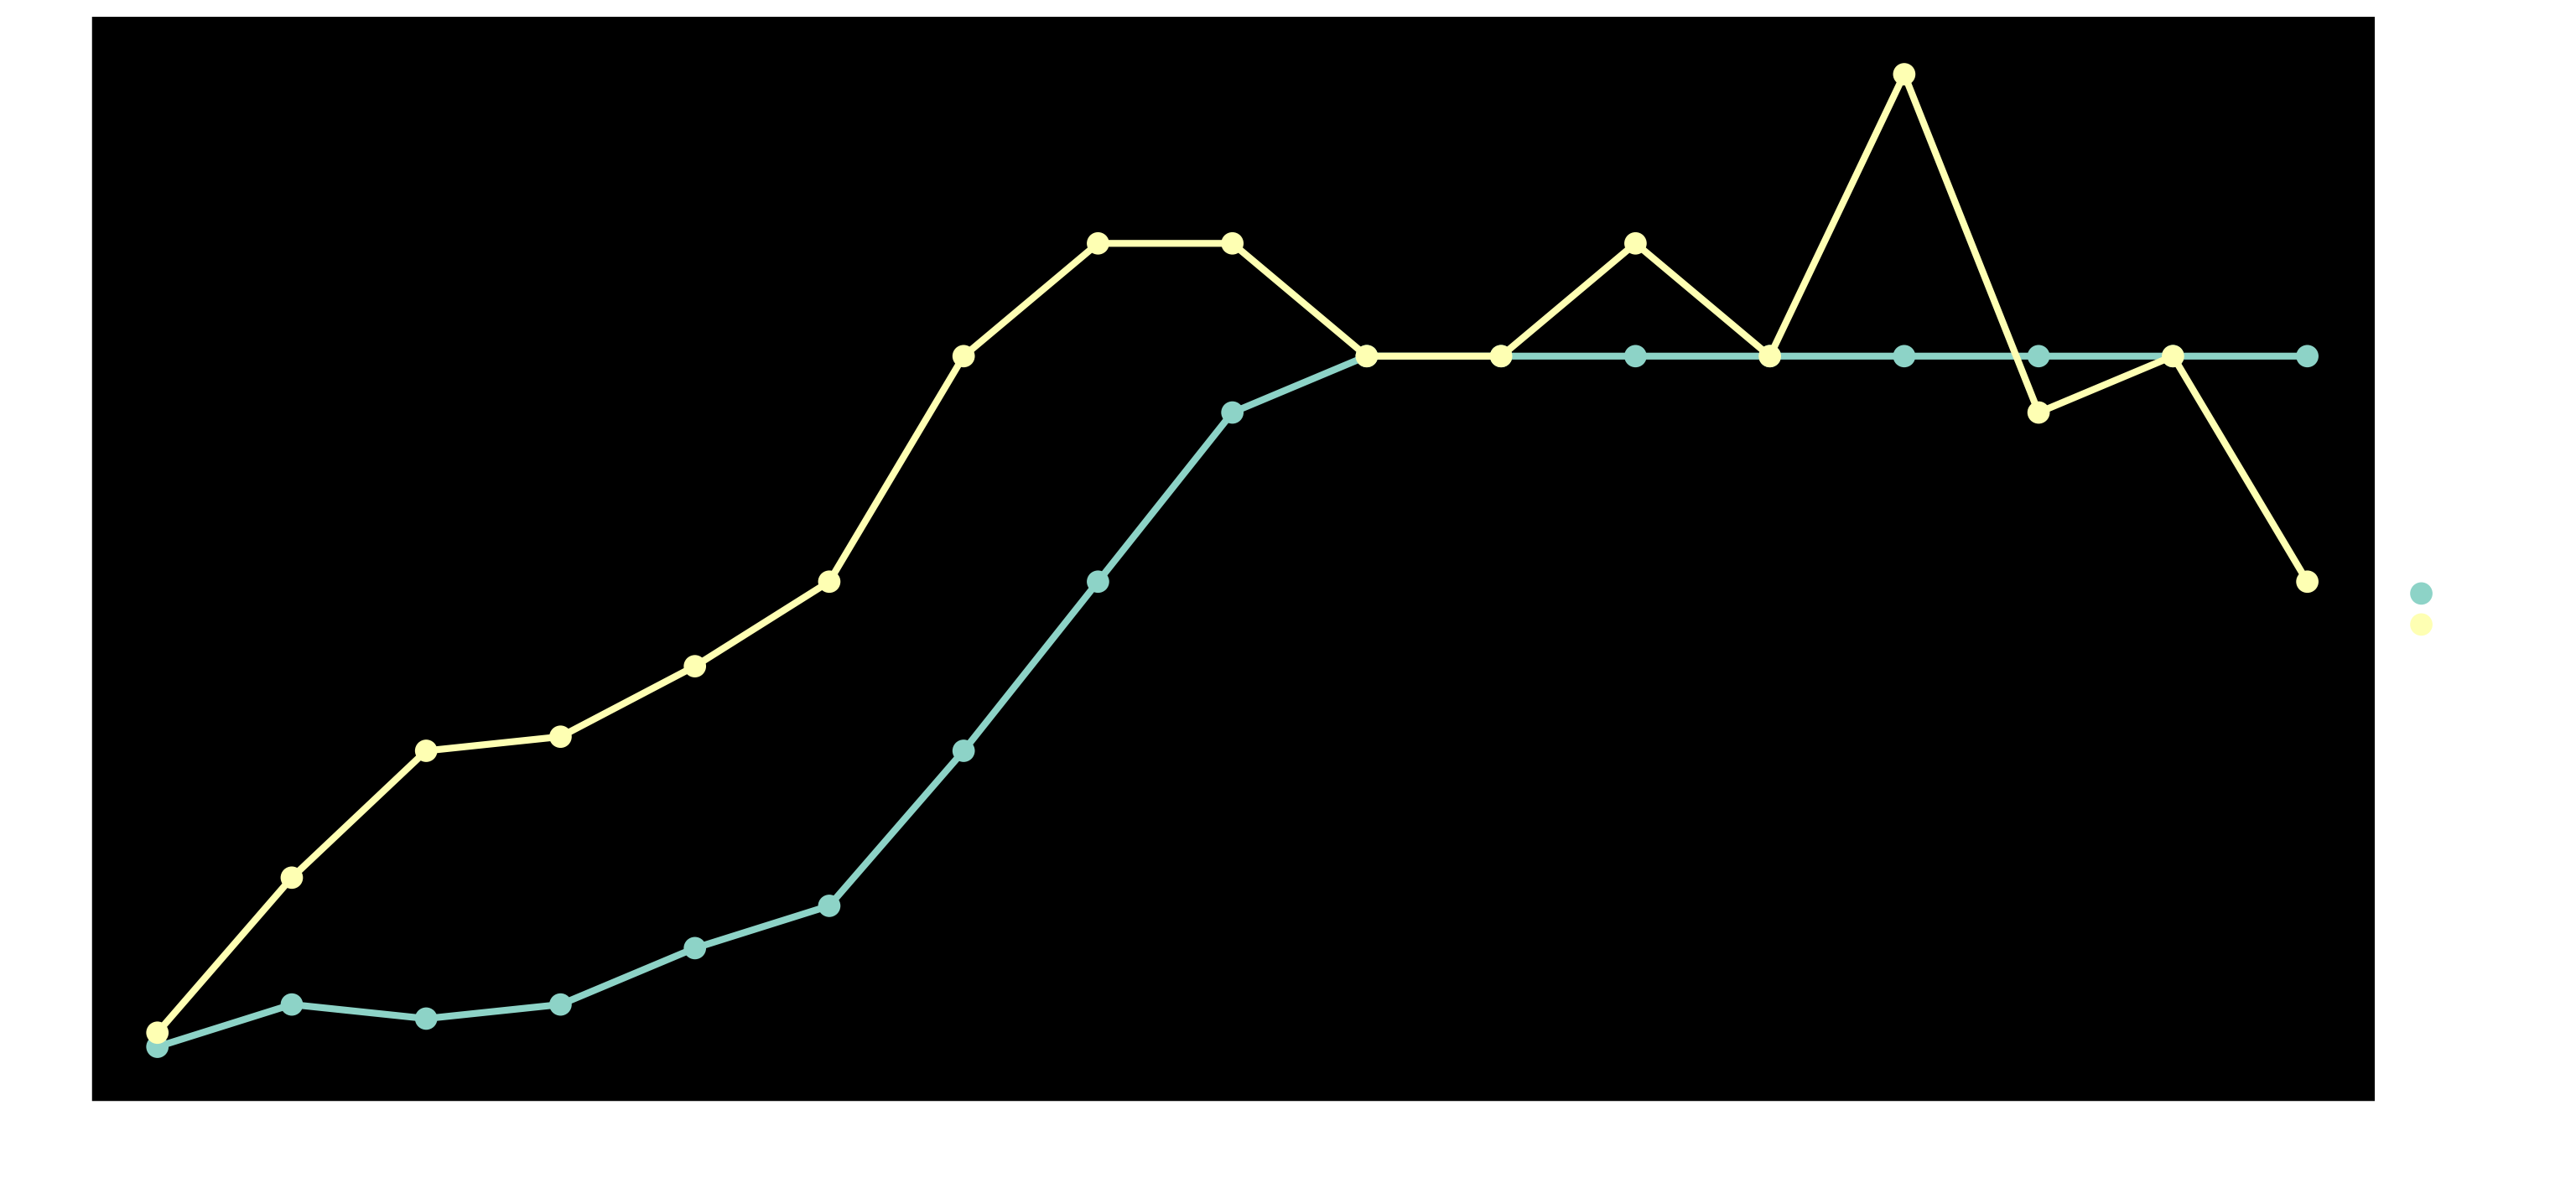

In [35]:
am_freq=freq[['age','alcohol','marijuana']].melt('age',var_name='type',value_name='Median Times Used')
sns.factorplot(x='age',y='Median Times Used',hue='type',size=10,aspect=2,data=am_freq)

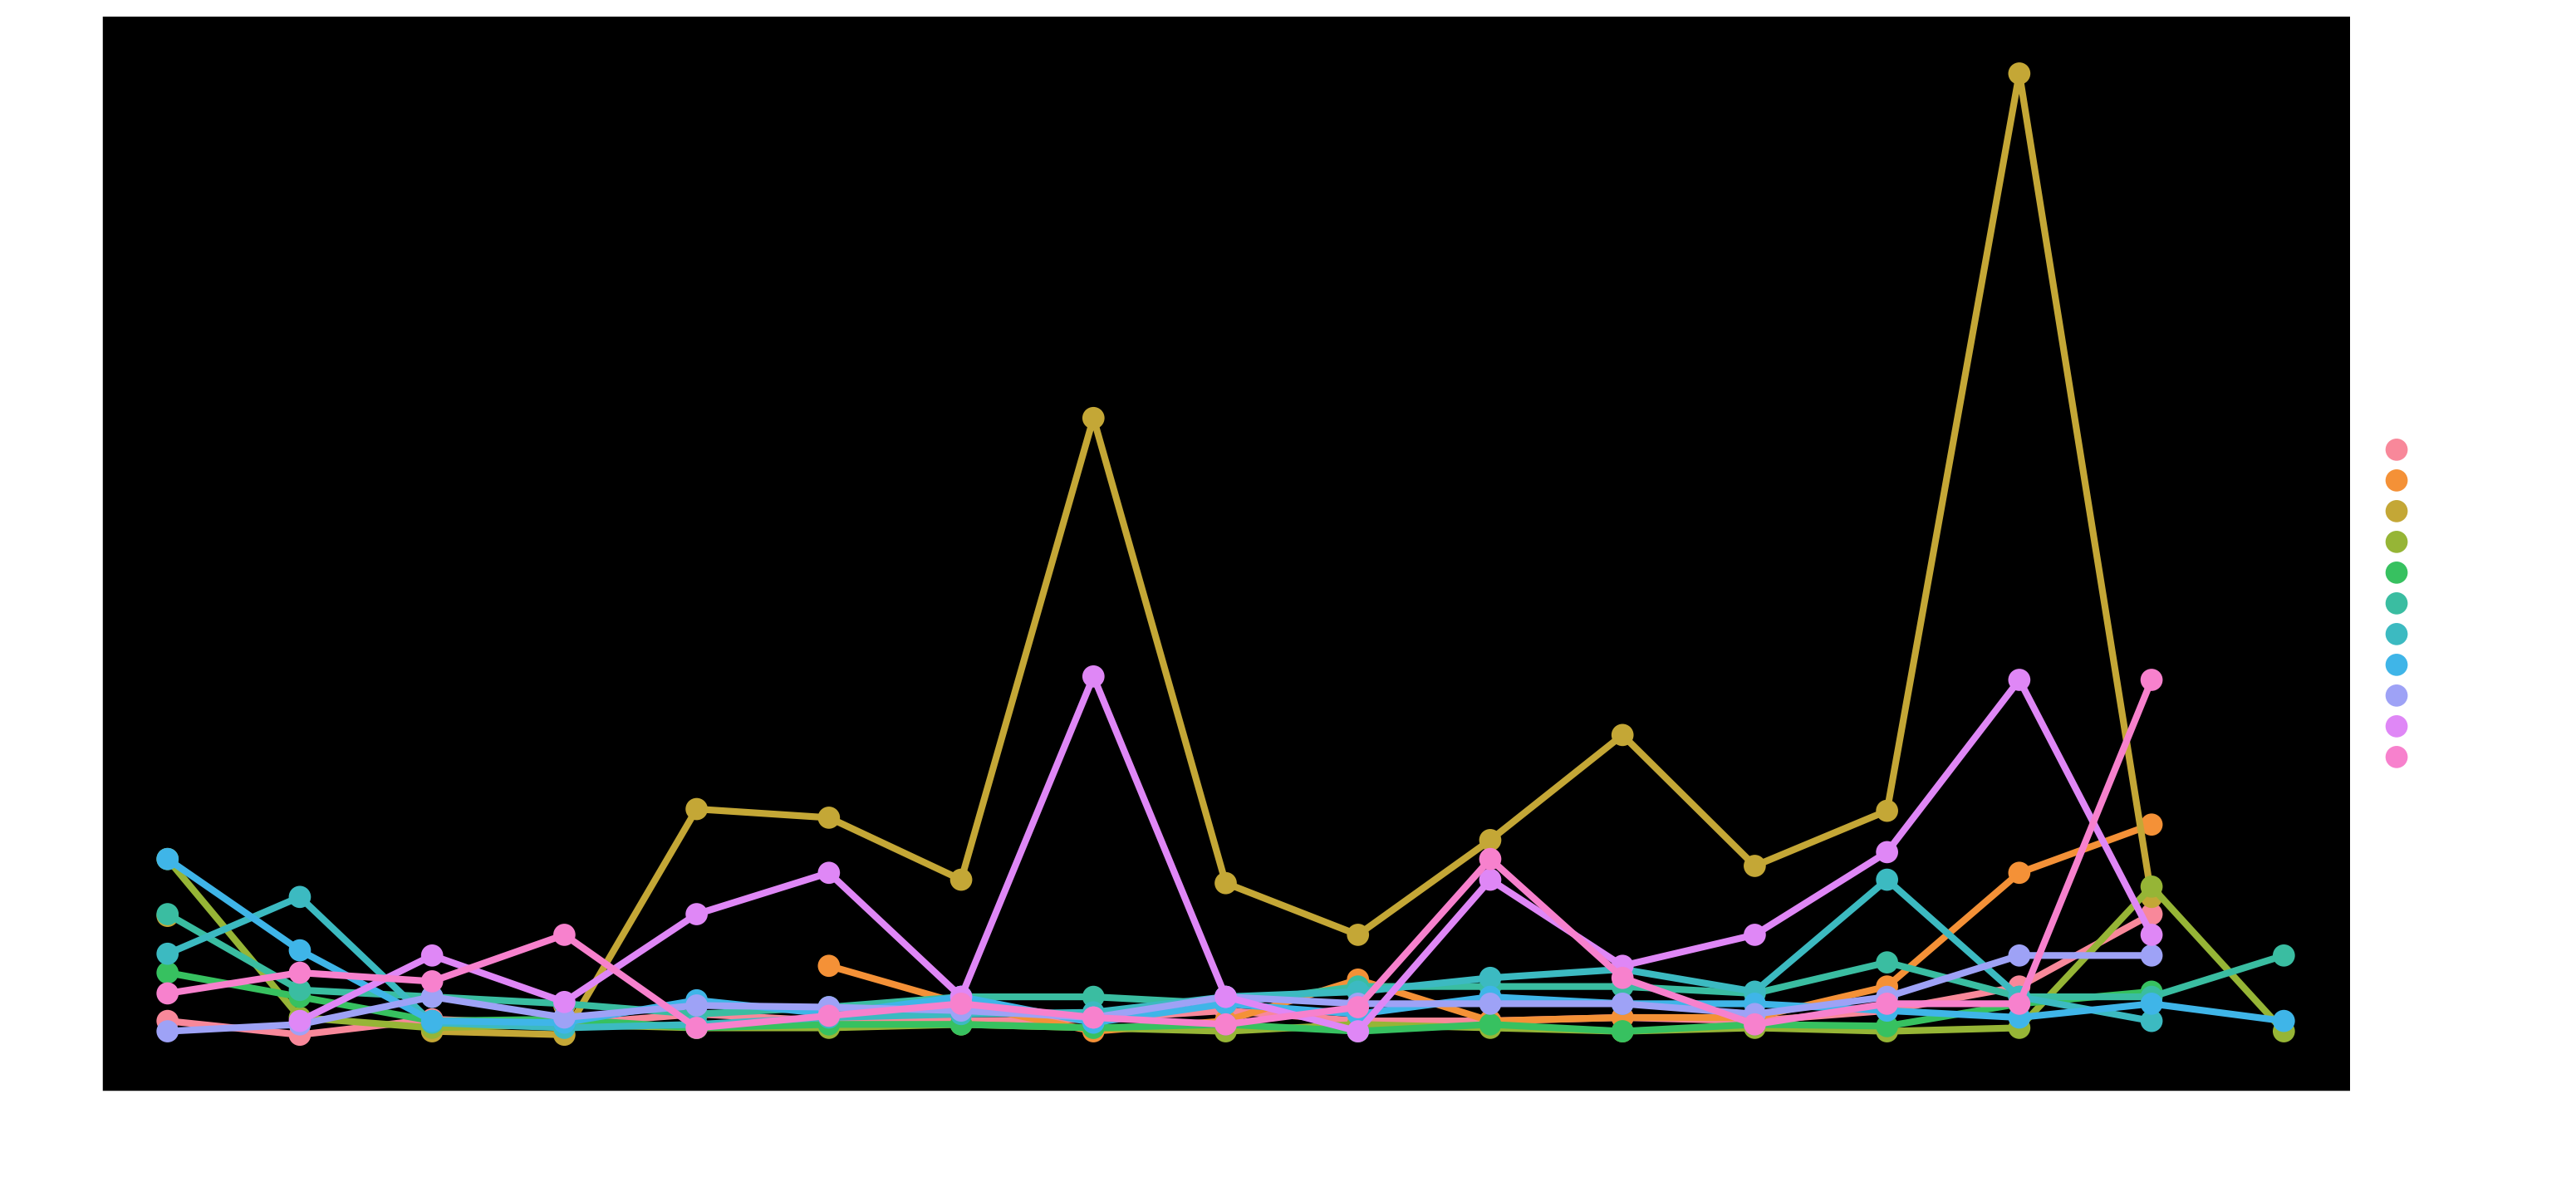

In [36]:
#Median Times used per user in past 12 mths (2012)
s_freq=freq.drop(['alcohol','marijuana'],axis=1).melt('age',var_name='type',value_name='Median Times Used')
sns.factorplot(x='age',y='Median Times Used',hue='type',size=10,aspect=2,data=s_freq)

In [37]:
#PAIRPLOT: MEDIAN no. of TIMES per USER
#sns.pairplot(freq.iloc[:,1:].fillna(0))

#### Comments
Good job here splitting alcohol and marijuana to plot on a different scale to enhance readability.


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**



In [38]:
hm_freq=df_drug[['age','heroin-frequency','meth-frequency']].copy(deep=True)
hm_freq.drop([16],axis=0,inplace=True) #Remove 65+ Row coz all 0s
hm_freq.sample(5)

,age,heroin-frequency,meth-frequency
1,13,nan,5.00
14,35-49,280.00,104.00
13,30-34,66.00,54.00
0,12,35.50,nan
6,18,46.00,12.00


In [39]:
hm_freq.describe(include='all')

,age,heroin-frequency,meth-frequency
count,16,15.00,15.00
unique,16,nan,nan
top,22-23,nan,nan
freq,1,nan,nan
mean,NaN,70.17,35.97
std,NaN,71.39,31.97
min,NaN,1.00,2.00
25%,NaN,38.25,12.00
50%,NaN,50.00,30.00
75%,NaN,66.25,47.00


<Figure size 432x288 with 0 Axes>

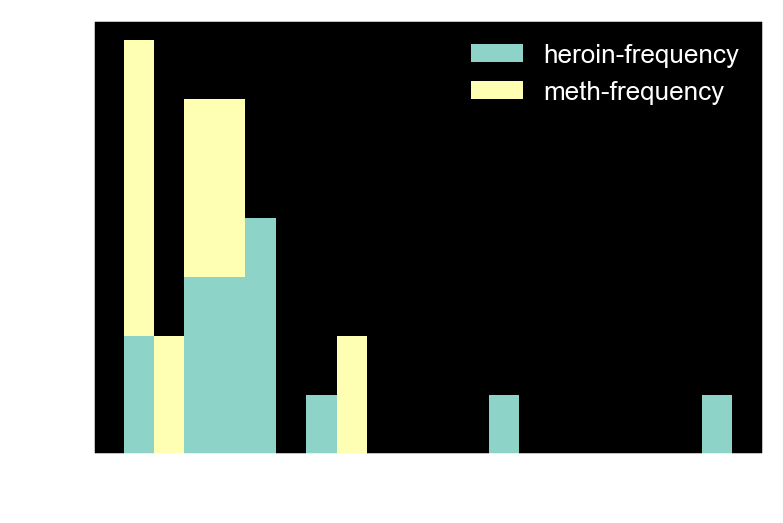

In [40]:
plt.figure();
hm_freq[['heroin-frequency','meth-frequency']].plot.hist(stacked=True,bins=20)

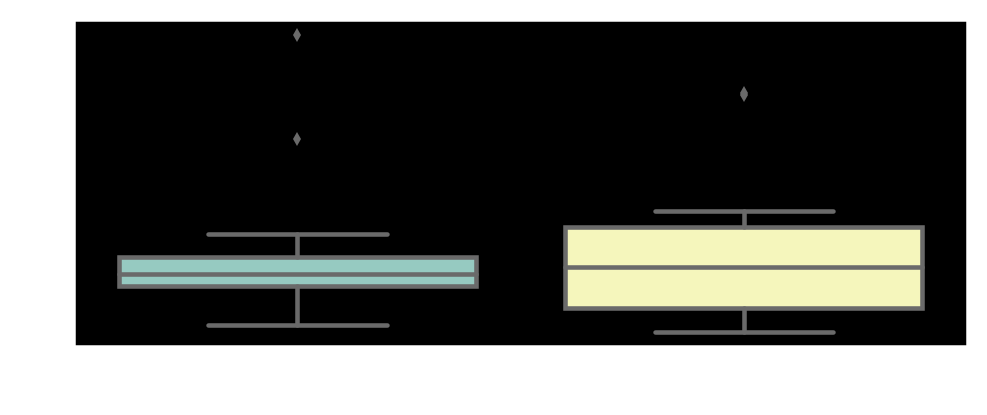

In [41]:
#PLOT STANDARDIZED BOXPLOT
df_box=hm_freq.iloc[:,1:] #Skip age & n
for a,b in df_box.items():
    avg=df_box[a].mean()
    std=np.std(df_box[a])
    df_box[a]=df_box[a].map(lambda b: (b-avg)/std) #(Value - Mean) / STD
fig=plt.figure(figsize=(8,3))
sns.boxplot(data=df_box,ax=fig.gca())

In [42]:
# pear=hm_freq.drop([7,14],axis=0) # Remove outlier rows for Pearson correlation
# print 'Pearson Correlation:',pear.iloc[:,1:].corr(method='spearman').values[1][0]
print 'Spearman Correlation:',hm_freq.iloc[:,1:].corr(method='spearman').values[1][0]

Spearman Correlation: 0.7599137376881451


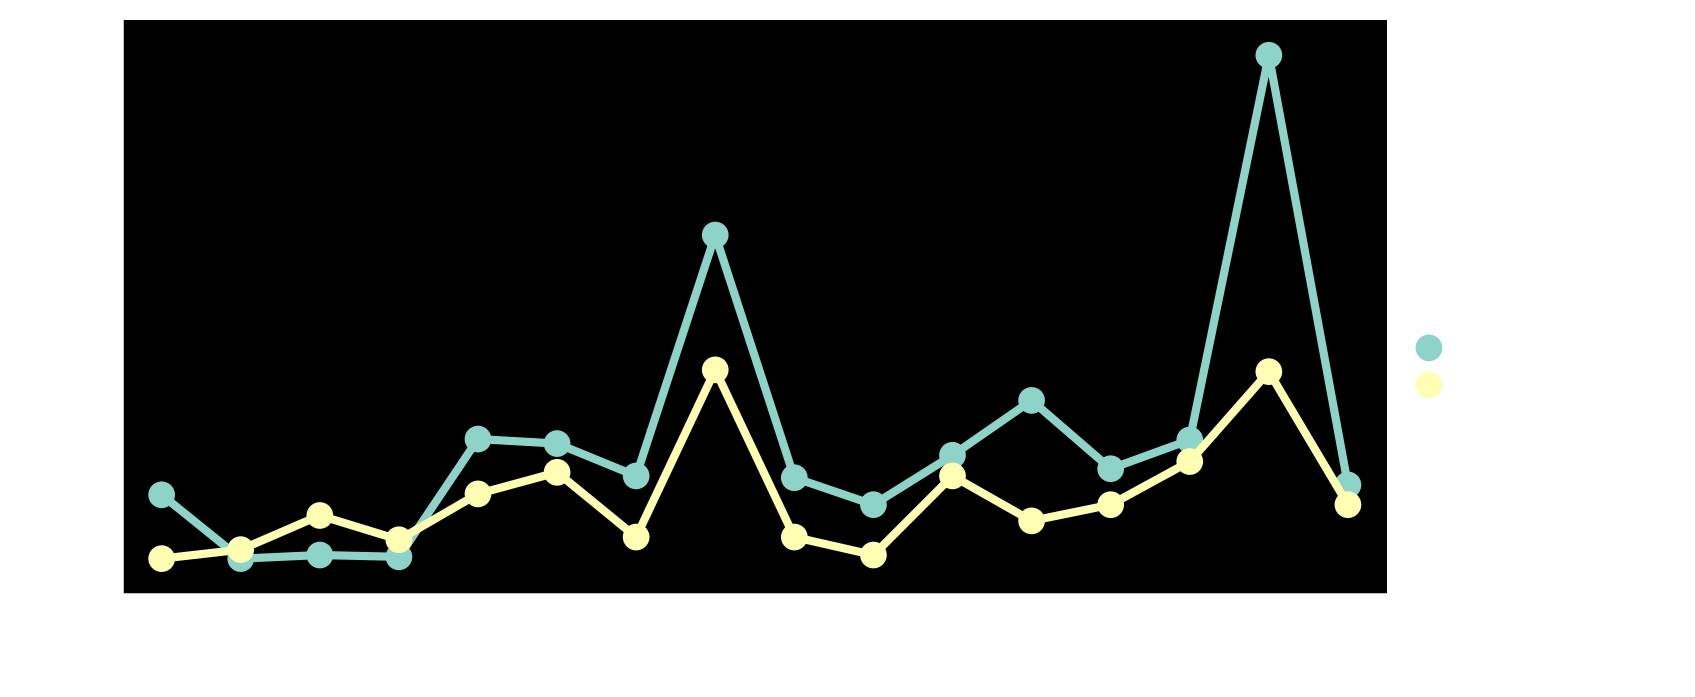

In [43]:
hm_plot=hm_freq.fillna(0).melt('age',var_name='type',value_name='Median Times Used')
sns.factorplot(x='age',y='Median Times Used',hue='type',size=5,aspect=2,data=hm_plot)

**Report**
1. Heroin & Meth 12 months frequencies correlated?
2. Deliverables:
	a. Heroin-frequency summary statistics
	b. Meth-frequency summary statistics
	c. Heroin & Meth box-plot results
	d. Heroin & Meth frequency correlated?

3. The frequency columns represent the median times a user of each age group used the drug over a course of 12 months; 65+ row is removed as the row contains null values for both variables. Looking at the means & standard deviation of both, we can easily see that heroin is easily double that of meth frequency; probably heroin users are more addicted than meth users. Though both have similar minimum values, the range of heroin (279) is nearly three times wider that of meth (103). From the stacked distribution table, we can see bulk of users used the drug < 80 times in 12 months. After standardisation, from the box-plots we can see that meth has a wider inter-quartile range than heroin meaning that 50% of the meth users tend to be more spread out than heroin; again indicating possibly heroin more addictive. Both boxes also shows outliers that are above Q3. We prefer to use spearman correlation rather than Pearson due to the existence of outliers for both datasets. After calculation, we find that heroin & meth frequencies have high correlation of 0.79. We can see further evidence of correlation through the factor plot at the bottom.

#### Comments
Nicely done here and good analysis. Small thing here, consider to split your point 3 into subpoints to make it more readable.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

[4L, 4L, 4L, 5L, 5L, 6L, 6L, 7L, 8L, 8L, 8L, 9L, 9L, 9L, 11L, 11L, 12L, 12L, 13L, 13L, 17L, 18L, 23L, 26L, 31L, 33L, 34L, 51L, 51L, 52L, 53L, 53L, 54L, 55L, 56L, 57L, 60L, 63L, 65L, 65L, 67L, 68L, 69L, 69L, 71L, 71L, 72L, 77L, 79L, 81L, 82L]


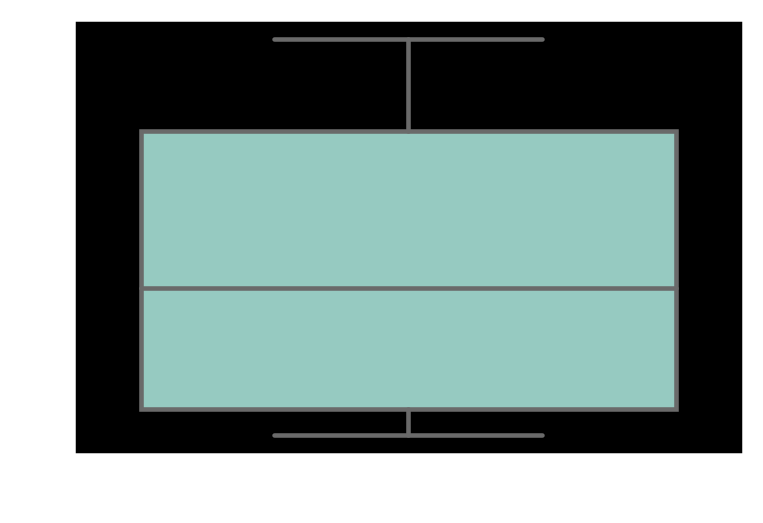

In [44]:
print sorted(df_sat['Rate'])
sns.boxplot(data=df_sat['Rate'])

As shown in the boxplot above, "Rate" has NO outliers. Outlier can be defined as any data point > 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile.

#### Comments
Nice! 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


1. Spearman Correlation: Strength & direction of the monotonic relationship (by Dataset Rank) between two variables
2. Pearson Correlation: Strength & direction of the linear relationship (by Dataset Value) between two variables
3. Spearman Process:-
    a. Get the Rank of each value for x & y Dataset ==> 2 sets of Ranking Datasets
    b. Get Covariance of x & y Dataset Ranks (Rank Covariance)
    c. Divide the "Rank Covariance" by the multiplication of x & y "Rank Standard Deviation"

In [45]:
print 'Spearman:',df_sat[['Math','Verbal']].corr(method='spearman').values[1][0]

Spearman: 0.9094125143903471


#### Comments
Nice!

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [46]:
df_sat['Percentile']=[stats.percentileofscore(df_sat['Rate'],r) for r in df_sat['Rate']]
df_sat.loc[df_sat['State']=='CA',['State','Percentile']] #CA = 56.73%

,State,Percentile
23,CA,55.88


Spearman is based on a ranking order of thev data; percentile is also somewhat a form of ranking

#### Comments
Nice!

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Potential outliers can be spotted by percentiles; there would be a "big jump" to outlier's percentile eg. 1.3 ==> 20.1 or 60.1 ==> 90.6

In [55]:
df_alcohol=df_drug[['age','alcohol-use']].copy(deep=True)
df_alcohol['Percentile']=[stats.percentileofscore(df_alcohol['alcohol-use'],a) for a in df_alcohol['alcohol-use']]
df_alcohol

,age,alcohol-use,Percentile
0,12,3.90,5.88
1,13,8.50,11.76
2,14,18.10,17.65
3,15,29.20,23.53
4,16,40.10,29.41
5,17,49.30,38.24
6,18,58.70,47.06
7,19,64.60,52.94
8,20,69.70,64.71
9,21,83.20,94.12


As shown below, by converting raw alcohol-use medians to percentile, we get from a varied distribution to an almost flat distribution.

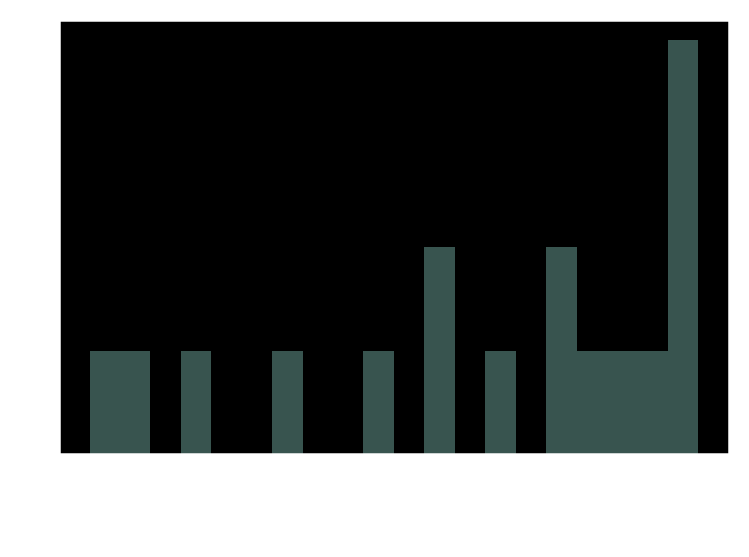

In [48]:
sns.distplot(df_alcohol['alcohol-use'],kde=False,bins=20)

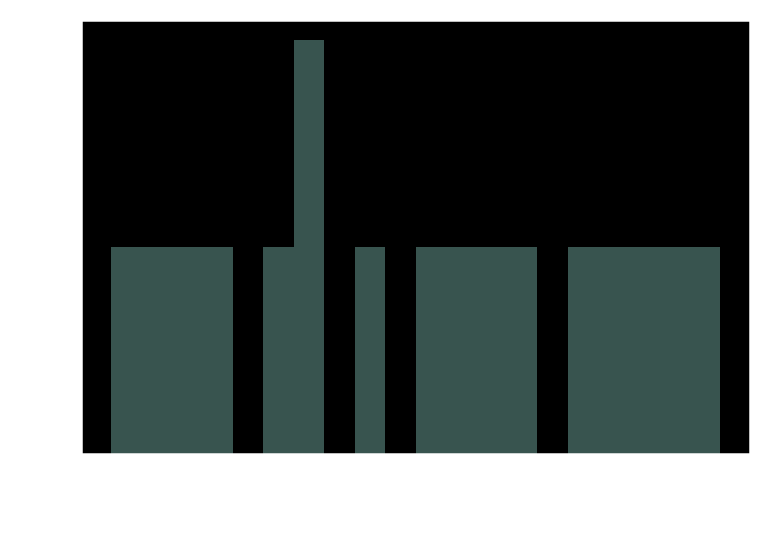

In [49]:
sns.distplot(df_alcohol['Percentile'],kde=False,bins=20)

#### Comments
Nice! Percentile actually buckets all your data point evenly, hence the relatively uniform distribution. You will not see the big jump in percentile for outliers. It could in fact be use to identify maybe your IQR fast.

Overall, job well done on this project. Your analysis is generally sound as well. On the presentation front, for long chunks of code perhaps you can split them into related sections to make it more readable.